In [1]:
trimucrn__dir='/home/subhajit/Desktop/EPTA_comparison/Data/trim/chains_ep_chen/crn_pl/'
trim_orfb_dir='/home/subhajit/Desktop/EPTA_comparison/Data/trim/chains_ep_chen/bin_orf/'

In [2]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append('/home/subhajit/Desktop/EPTA_comparison/notebooks')
from diff_chain import  Diff_chain_shift

2023-04-02 04:53:57.976178: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 04:53:58.001984: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 04:53:58.002464: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 04:53:58.458013: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
par_orfb=pd.read_csv(trim_orfb_dir+'pars.txt', header = None)
lt=len(par_orfb)
par_orfb

,0
0,J0030+0451_red_noise_gamma
1,J0030+0451_red_noise_log10_A
2,J0613-0200_dm_gp_gamma
3,J0613-0200_dm_gp_log10_A
4,J0751+1807_dm_gp_gamma
...,...
69,gw_orf_bin_2
70,gw_orf_bin_3
71,gw_orf_bin_4
72,gw_orf_bin_5


In [4]:
orfb_1=np.loadtxt(trim_orfb_dir+'chain_1.txt',usecols=(lt-8,lt-9,-4))

In [5]:
par_ucrn=pd.read_csv(trimucrn__dir+'pars.txt', header = None)
lf=len(par_ucrn)
par_ucrn

,0
0,J0030+0451_red_noise_gamma
1,J0030+0451_red_noise_log10_A
2,J0613-0200_dm_gp_gamma
3,J0613-0200_dm_gp_log10_A
4,J0751+1807_dm_gp_gamma
...,...
62,J2124-3358_dm_gp_log10_A
63,J2322+2057_red_noise_gamma
64,J2322+2057_red_noise_log10_A
65,gw_crn_gamma


In [6]:
ucrn_1=np.loadtxt(trimucrn__dir+'chain_1.txt',usecols=(lf-1,lf-2,-4))

In [7]:
orfb=orfb_1.T[0:2];ucrn=ucrn_1.T[0:2]

In [8]:
names_red = ['logA_R','gamma_R']
labels_red=['\log A_{R}','\gamma_{R}']
del_names=['delta_logA_R','delta_gamma_R']

In [9]:
orfb_red=MCSamples(samples=np.array(orfb).transpose(),loglikes=orfb_1.T[-1],names=names_red,labels=labels_red,label='ORF binned')
ucrn_red=MCSamples(samples=np.array(ucrn).transpose(),loglikes=ucrn_1.T[-1],names = names_red,labels=labels_red,label='UCRN')


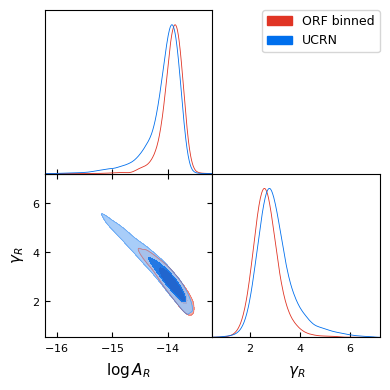

In [10]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([orfb_red,ucrn_red], filled=True)
plt.savefig('orfbvsucrn.png',dpi=300)
plt.show()

In [11]:
def plot_diff_chain(A1,A2,lims=None,off_size=None):
    diff_chain, nsig, shift_lower, shift_upper=Diff_chain_shift(A1,A2,off_size)
    
    shift_probability=utilities.from_sigma_to_confidence(nsig)
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' & '+A2.getLabel()+ 
                  '\n\n $\Delta=$'+str("{:.4f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    plt.savefig(A1.getLabel()+'_'+A2.getLabel()+'.png',dpi=300)
    
    return diff_chain,shift_probability
    

(<getdist.mcsamples.MCSamples at 0x7f3d088d6df0>, 0.02332079598804951)

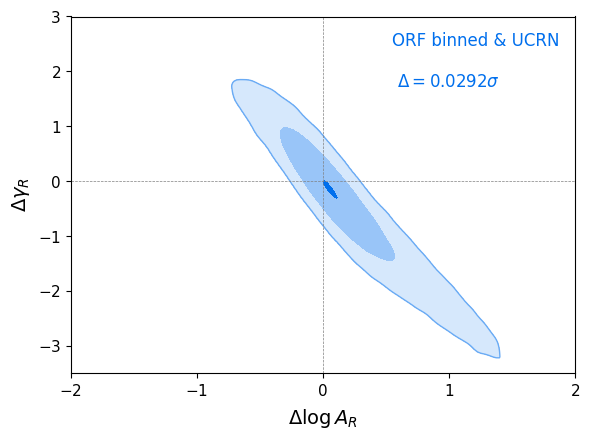

In [12]:
plot_diff_chain(orfb_red,ucrn_red,lims=[-2,2,-3.5,3])